#### load data

In [17]:
df_sfa = pd.read_csv("SFA_Faulty_Dataset.csv")
df_rwa = pd.read_csv("RWA_Faulty_Dataset.csv")

# drop unused features (columns)
df_sbw = df_sfa.append(df_rwa).reset_index(drop=True)
df_sbw.drop(["Order", "swcName", "swcVer", "createdDate"], axis=1, inplace=True)

df_sbw.loc[df_sbw["isDefective"] == "N", "isDefective"] = "0"
df_sbw.loc[df_sbw["isDefective"] == "Y", "isDefective"] = "1"

# change type
df_sbw["isDefective"] = df_sbw["isDefective"].astype(str).astype(int)

df_sbw.tail(2)

,isDefective,progLength,vocaCnt,volume,difficultyLv,progLv,effortToImpl,timeToImpl,nloc,minParaCnt,maxParaCnt,avgParaCnt,funCnt,minCyclo,maxCyclo,avgCyclo,expLvOfDev,affectedBoundary,revFreq
444,1,214,57,1248.238463,14.325581,6.082373,17881.74170,993.430095,48,1,1,1.0,2,1,9,5.000000,22.393443,1,6
445,0,116,31,574.686772,12.272727,3.815479,7052.97402,391.831890,15,1,1,1.0,0,2,10,5.416667,49.475410,3,35


In [15]:
from sklearn.model_selection import train_test_split

In [81]:
# 시각화를 위한 feature 2개 선정
X = df_sbw.loc[:, ["expLvOfDev", "revFreq"]]
y = df_sbw["isDefective"]
X = X.to_numpy()
y = y.to_numpy()

train_X, test_X, train_y, test_y = train_test_split(X, y)


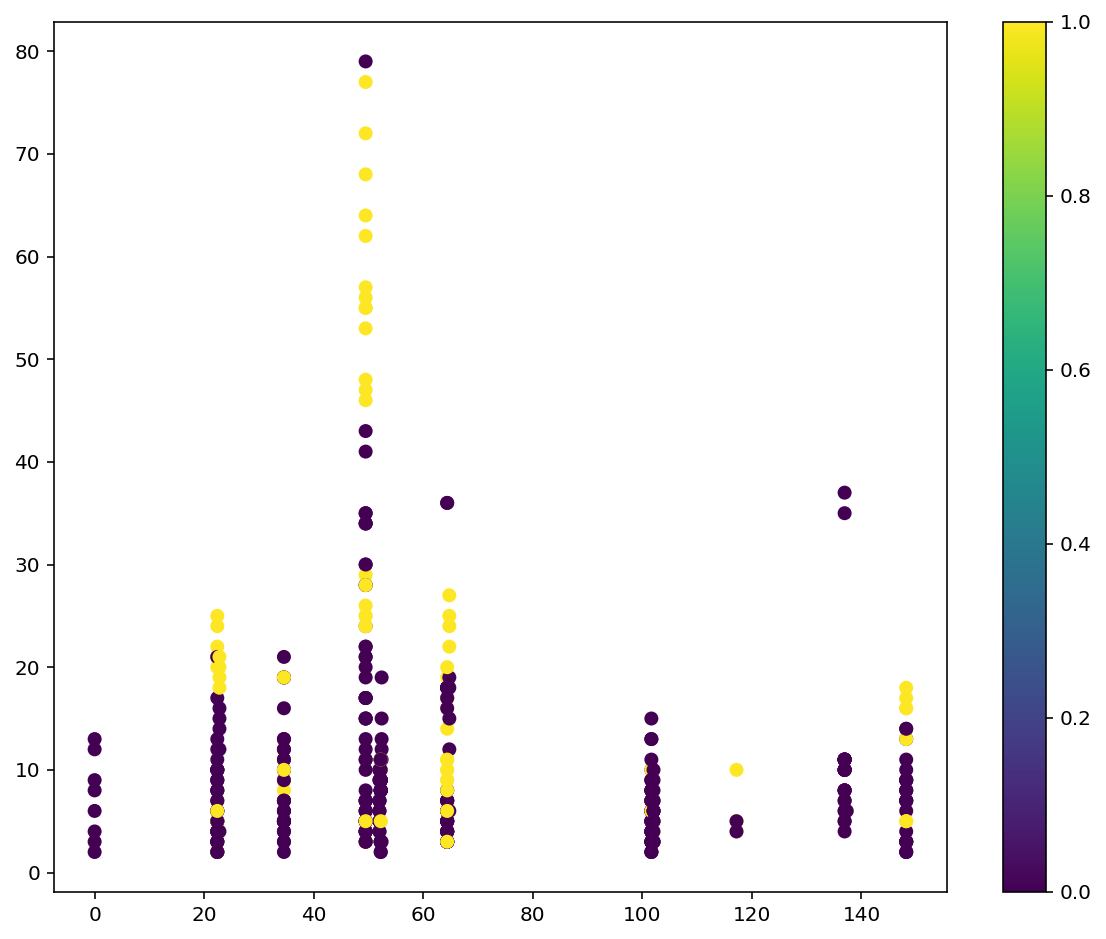

In [82]:
plt.figure(figsize=[10,8])
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [83]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(train_X, train_y)

score = model.score(train_X, train_y)
print(score)

0.8562874251497006


In [85]:
display(model.coef_, model.intercept_)

array([[-0.00331836,  0.02885022]])

array([-1.02470221])

IndexError: too many indices for array

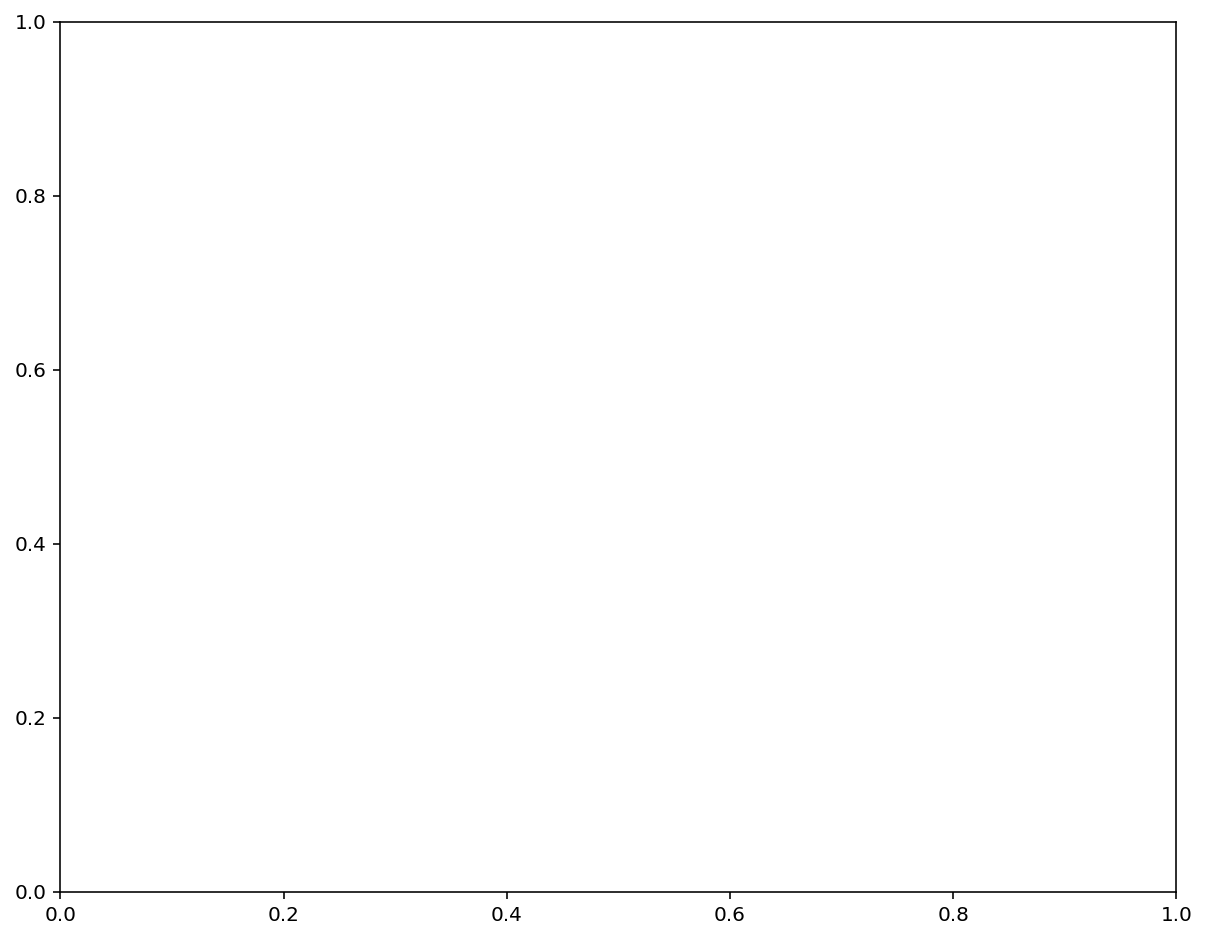

In [87]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, train_X[:,0], eps=0.1, cm='spring')
mglearn.discrete_scatter(train_X[:,0], train_y[:,1], train_y)